# Class 23: Interpretting Regression Evaluations

1. Snow in October. Share your thoughts in the zoom chat
1. Log onto prismia

In [1]:
# %load http://drsmb.co/310
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
X, y = datasets.load_boston(return_X_y= True)

In [3]:
X[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [4]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [5]:
X_train, X_test, y_train, y_teest = train_test_split(X,y)

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [7]:
regr.score(X_test,y_teest)

0.671890499528835

In [8]:
y_pred = regr.predict(X_test)

In [9]:
# %load http://drsmb.co/310
col_name = ['ZN ',
'INDUS ',
'CHAS ',
'NOX ',
'RM ',
'AGE ',
'DIS ',
'RAD ',
'TAX ',
'PTRATIO ',
'B ',
'LSTAT ',
'MEDV ']

In [10]:
test_df = pd.DataFrame(data=X_test, columns = col_name)
test_df.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,307.0,21.0,394.33,16.30
1,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70
2,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98
3,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02
4,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59


In [11]:
test_df['y_test'] = y_teest
test_df['y_pred'] = y_pred

In [12]:
error = lambda r: r['y_test'] - r['y_pred']
test_df['pred_error'] = test_df.apply(error,axis=1)

In [13]:
test_df['errror'] = y_teest - y_pred

In [14]:
test_df.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,y_test,y_pred,pred_error,errror
0,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,307.0,21.0,394.33,16.30,15.6,15.854694,-0.254694,-0.254694
1,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70,27.9,31.012470,-3.112470,-3.112470
2,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,19.1,19.445683,-0.345683,-0.345683
3,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02,8.4,5.035947,3.364053,3.364053
4,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0,7.070564,-2.070564,-2.070564


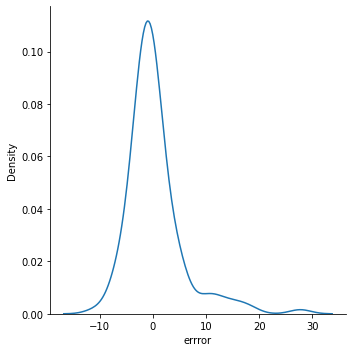

In [15]:
sns.displot(data=test_df, x='errror', kind = 'kde')